# 0.2 Wines SPA Data Wrangling

Este dataset es para complementar los datos de wines_dataset.csv y asi generar un set de datos más completo. 
Cabe aclarar un pequeño disclaimer: Los datasets fueron obtenidos de fuentes distintas, por lo que al final del proyecto podemos llegar a tener una inconsistencia en la prediccion. 
En este notebook realizaremos el analisis para el data set de wines_SPA.csv que representan vinos de España y contras variables distintas al otro dataset. Luego procederemos a limpiarlo como parte de la etapa de data wrangling para finalmente mergear los dos dataset y empezar con la etapa de EDA.

## Import libraries

In [480]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [481]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
# Modulo para trabajar con los directorios del proyecto
from src.utils.paths import data_dir

In [482]:
from src.visualization.word_cloud import words_cloud
from src.visualization.analysis_univariate import univariate_analysis
import src.utils.statistics as stats

## Set up

In [483]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles

pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

## Read Data

In [484]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_SPA_RAW_CSV_PATH = data_dir("raw", "wines_SPA.csv")

WINES_SPA_RAW_CSV_PATH

WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/raw/wines_SPA.csv')

### SETUP

In [485]:
# Leemos los csv's y los guardamos en un dataframe
df_wine_spa = pd.read_csv(WINES_SPA_RAW_CSV_PATH)

In [487]:
# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Wine SPA Dataset

### Descubrimiento y estructuración
- Comprender los datos la estructura, tipos y calidad

In [488]:
# Shape de los datos
shape_df =df_wine_spa.shape
print(f"{shape_df=}")

shape_df=(7500, 11)


In [489]:
#Vista previa de 5 datos aleatorios
df_wine_spa.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
5900,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.50,Rioja Red,4.0,3.0
1653,Barahonda,Summum Monastrell,2019,4.3,50,Espana,Yecla,13.99,Monastrell,5.0,3.0
2206,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Espana,Rias Baixas,16.78,Albarino,3.0,3.0
2252,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Red,4.0,3.0
1210,Bodegas San Roman,Tinto,2018,4.3,693,Espana,Toro,25.90,Toro Red,5.0,3.0


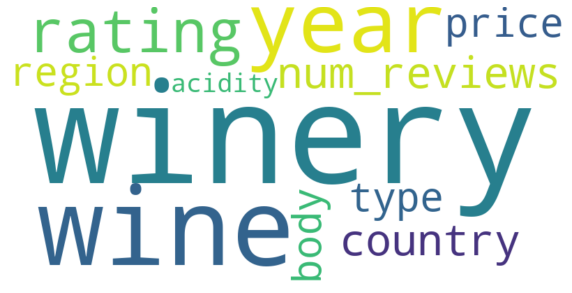

In [490]:
#Mostramos las columnas del dataframe
words_cloud(list(df_wine_spa.columns))

In [491]:
# Obtenemos información de las columnas de los datos
df_wine_spa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [492]:
# Mostramos las principales estadisticas de las columnas
df_wine_spa.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7500.0,4.254933,0.118029,4.20,4.2,4.20,4.20,4.90
num_reviews,7500.0,451.109067,723.001856,25.00,389.0,404.00,415.00,32624.00
price,7500.0,60.095822,150.356676,4.99,18.9,28.53,51.35,3119.08
body,6331.0,4.158427,0.583352,2.00,4.0,4.00,5.00,5.00
acidity,6331.0,2.946612,0.248202,1.00,3.0,3.00,3.00,3.00


In [493]:
print (f"Hay {shape_df[0]} filas y {shape_df[1]} columnas en el dataset de wine_spa")
print (f"Hay {df_wine_spa['country'].nunique()} paises donde se fabrican los vinos, como {' y '.join(df_wine_spa['country'].unique()[0:5])}")
print (f"El promedio de precios es {round(df_wine_spa['price'].mean(), 3)} y su mediana es {round(df_wine_spa['price'].median(), 3)}")
print (f"El promedio de ratings es {round(df_wine_spa['rating'].mean(), 3)} y su mediana es {round(df_wine_spa['rating'].median(), 3)}")

Hay 7500 filas y 11 columnas en el dataset de wine_spa
Hay 1 paises donde se fabrican los vinos, como Espana
El promedio de precios es 60.096 y su mediana es 28.53
El promedio de ratings es 4.255 y su mediana es 4.2


Podemos observar que en el dataframe la columna `country` tiene  un solo valor, que es `Spain`, por lo tanto procederemos a eliminarla.

In [494]:
df_wine_spa.country.value_counts()

Espana    7500
Name: country, dtype: int64

In [495]:
## Eliminamos la columna country del dataset
df_wine_spa.drop(columns=['country'], inplace=True)
df_wine_spa.shape

(7500, 10)

La columna `year` aparece como categorica, cuando se supone que debe ser numerica. Vemos los valores que tiene y los convertimos a numerico.

In [496]:
# Value count df_wines_spa year
df_wine_spa.year.value_counts().sort_index()

1910      1
1922      1
1925      1
1928      1
1929      1
       ... 
2018    850
2019    331
2020    474
2021      6
N.V.    288
Name: year, Length: 71, dtype: int64

Observamos un regitro que tiene un valor `N.V.` en la columna en la columna `year`. Vemos que es un valor que dificilmente podamos convertir a numerico, o incluso reemplazarlo por un valor que nos convenga. Por lo tanto procederemos a eliminar estos registros

In [497]:
# Antes de eliminar los registros, analizamos los datos
df_year_wrong_values = df_wine_spa[df_wine_spa.year == 'N.V.']
print(f"{df_year_wrong_values.shape=}")
df_year_wrong_values.sample(5)


df_year_wrong_values.shape=(288, 10)


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
6188,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.1,Sherry,4.0,3.0
1171,Gonzalez-Byass,Apostoles 30 Years Old Sherry,N.V.,4.3,1247,Jerez Palo Cortado,74.0,Sherry,4.0,3.0
3412,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.1,Sherry,4.0,3.0
6913,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.1,Sherry,4.0,3.0
5887,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.1,Sherry,4.0,3.0


In [498]:
# Eliminamos los registros que tengan el valor N.V.
df_wine_spa = df_wine_spa.drop(df_wine_spa[df_wine_spa.year == 'N.V.'].index).reset_index(drop=True)
df_wine_spa.shape

(7212, 10)

## Missing values

<AxesSubplot:>

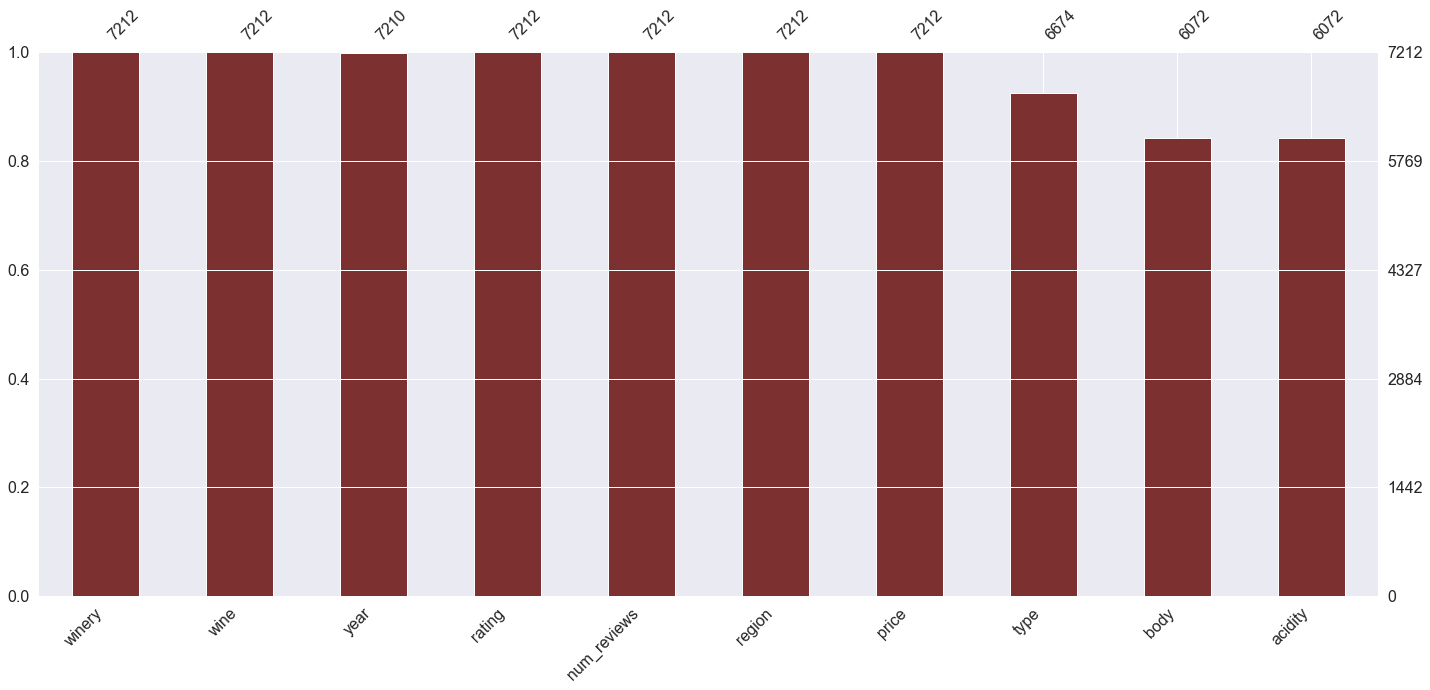

In [499]:
# Visualizamos los missings utilizando la libreria missingno
msno.bar(df_wine_spa, color= COLOR_VINO_TINTO)

Determinamos si en el dataset hay valores faltantes.

In [500]:
# Revisamos si hay alguna fila que tenga todas sus columnas vacias
df_wine_spa.isna()[(df_wine_spa.isna() == True).all(axis='columns')]


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity


In [501]:
# Revisamos si hay alguna fila que tenga alguna de sus columnas vacias
q_rows_any_colum_null = len(df_wine_spa.isna()[(df_wine_spa.isna() == True).any(axis='columns')])
print(f"Hay {q_rows_any_colum_null} filas con alguna columna vacia")

Hay 1142 filas con alguna columna vacia


In [502]:
# Revisamos las columnas que tienen valores null
missing_values_table = pd.DataFrame(df_wine_spa.isna().sum().sort_values(ascending=False)).reset_index()
missing_values_table.columns = ['column', 'missing_values']
missing_values_table['%missing_values'] = round((missing_values_table['missing_values'] / df_wine_spa.shape[0]) * 100, 3)

missing_values_table

,column,missing_values,%missing_values
0,body,1140,15.807
1,acidity,1140,15.807
2,type,538,7.460
3,year,2,0.028
4,winery,0,0.000
5,wine,0,0.000
6,rating,0,0.000
7,num_reviews,0,0.000
8,region,0,0.000
9,price,0,0.000


Tenemos valores faltantes en las columnas:
- body: 15.587%
- acidity: 15.587%
- type: 7.267%
- year: 0.027%

In [503]:
# Observamos una pequeña muestra de las columnas que tienen valores null
rows_with_missing_values = df_wine_spa[df_wine_spa.isna().any(axis=1)]
rows_with_missing_values.sample(5)


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2519,Ramon do Casar,Treixadura,2020,4.2,407,Ribeiro,11.95,NaN,NaN,NaN
4841,Losada,Altos de Losada,2018,4.2,415,Bierzo,17.90,Mencia,NaN,NaN
2401,Binigrau,Nounat,2020,4.2,404,Mallorca,19.90,NaN,NaN,NaN
6040,Sierra Cantabria,Coleccion Privada,2012,4.2,420,Rioja,28.30,Rioja Red,NaN,NaN
828,Bodegas Mauro,Godello Blanco,2019,4.4,134,Bierzo,37.60,NaN,NaN,NaN


In [504]:
print(f"Hay {len(rows_with_missing_values)} filas con valores null")

Hay 1142 filas con valores null


Observamos que hay algunas filas donde no hay valores para mas de una columna

In [505]:
# Obtenemos el nombre de las columnas que tienen valores null
columns_with_missing_values = list(missing_values_table[missing_values_table['missing_values']>0].column)
columns_with_missing_values

['body', 'acidity', 'type', 'year']

Verificamos si hay alguna fila donde no hay valores en cada una de las columnas de colums_with_missing_values.

In [506]:
#Verificamos si hay alguna fila donde en cada una de las columnas de colums_with_missing_values no tenga valores
df_null_boolean = rows_with_missing_values.isna()
index_rows_null = df_null_boolean[columns_with_missing_values][(rows_with_missing_values[columns_with_missing_values].isna() == True).all(axis='columns')].index
print(f"La cantidad de filas con valores null en las columnas {columns_with_missing_values} a la vez es de {len(index_rows_null)}")
df_wine_spa.iloc[index_rows_null]

La cantidad de filas con valores null en las columnas ['body', 'acidity', 'type', 'year'] a la vez es de 0


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity


No hay valores faltantes con las cuatro columnas de columns_with_missing_values, pero si pudimos observar que hay filas donde no hay valores en las columna `body`, `acidity` y `type`. 

In [507]:
columns_with_missing_values.pop()
columns_with_missing_values

['body', 'acidity', 'type']

In [508]:
#Verificamos si hay alguna fila donde en cada una de las columnas de colums_with_missing_values no tenga valores
df_null_boolean = rows_with_missing_values.isna()
index_rows_null = df_null_boolean[columns_with_missing_values][(rows_with_missing_values[columns_with_missing_values].isna() == True).all(axis='columns')].index
print(f"La cantidad de filas con valores null en las columnas {columns_with_missing_values} a la vez es de {len(index_rows_null)}")
#df_wine_spa.iloc[index_rows_null]
# display df_wine_spa with index = index_rows_null
df_wine_spa.iloc[index_rows_null].sample(5)

La cantidad de filas con valores null en las columnas ['body', 'acidity', 'type'] a la vez es de 538


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
5233,Binigrau,Nounat,2020,4.2,404,Mallorca,19.90,NaN,NaN,NaN
6168,Ramon do Casar,Treixadura,2020,4.2,407,Ribeiro,11.95,NaN,NaN,NaN
2161,Binigrau,Nounat,2020,4.2,404,Mallorca,19.90,NaN,NaN,NaN
4391,Ramon do Casar,Treixadura,2020,4.2,407,Ribeiro,11.95,NaN,NaN,NaN
2185,Binigrau,Nounat,2020,4.2,404,Mallorca,19.90,NaN,NaN,NaN


Procedemos a eliminar las filas que cumplen esa condicion porque completar esos datos distorcionaria el dataset.

In [509]:
#Eliminamos las filas con los indices de index_rows_null
df_wine_spa.drop(index=index_rows_null, inplace=True)
print(f"{df_wine_spa.shape=}")

df_wine_spa.shape=(6674, 10)


Ahora procedemos analizar cada columna de manera independiente.

### Year

La columna `year` tiene el indice bajo de registros faltantes

In [510]:
# Obtenemos las filas que tienen la columna year vacia
df_year_nan = df_wine_spa[df_wine_spa['year'].isna()]
df_year_nan

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
45,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
830,La Unica,Fourth Edition,NaN,4.4,131,Vino de Espana,40.0,Tempranillo,4.0,2.0


Como son solo dos registros añadimos los indices a la lista de filas a borrar

In [511]:
# Eliminamos las filas que tienen la columna year vacia
df_wine_spa.drop(index=df_year_nan.index, inplace=True)
print(f"{df_wine_spa.shape=}")

df_wine_spa.shape=(6672, 10)


Ahora si podemos castear el tipo de dato de la columna `year` a numerico.

In [512]:
# Convertimos la columna year a int
df_wine_spa['year'] = df_wine_spa['year'].astype(int)
df_wine_spa['year'].dtype

dtype('int32')

### Type

In [513]:
# Obtenemos las filas que tienen la columna type vacia
df_type_nan = df_wine_spa[df_wine_spa['type'].isna()]
df_type_nan

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity


Ya no tenemos registros faltantes en la columna `type` debido a la eliminacion conjunta que hicimos anteriormente. Eso quiere decir que todas las columnas que tenian la columna `type` tambien tenian las columnas `body`, `acidity` vacias

### Acidity

In [514]:
# Obtenemos las filas que tienen la columna acidity vacia
df_acidity_nan = df_wine_spa[df_wine_spa['acidity'].isna()]
print(f"La cantidad de filas con valores null en las columna acidity es de {len(df_acidity_nan)}")
df_acidity_nan.sample(5)

La cantidad de filas con valores null en las columna acidity es de 602


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1112,Pago de Los Capellanes,Reserva Tinto,2015,4.3,2295,Ribera del Duero,80.35,Ribera Del Duero Red,NaN,NaN
4845,Vina Pedrosa,Gran Reserva,2011,4.2,410,Ribera del Duero,51.35,Ribera Del Duero Red,NaN,NaN
1493,Tinto Pesquera,Reserva,1995,4.3,81,Ribera del Duero,73.00,Ribera Del Duero Red,NaN,NaN
3080,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,NaN,NaN
3486,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,NaN,NaN


<AxesSubplot:>

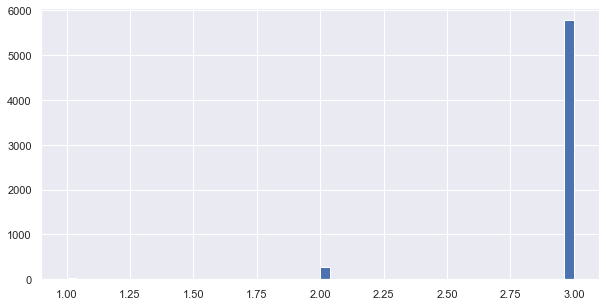

In [515]:
# Observamos la distribución de los valores de acidity
df_wine_spa['acidity'].hist(bins=50)

In [516]:
# Vemos los valores unicos de acidity
df_wine_spa['acidity'].value_counts(normalize=True)

3.0    0.951565
2.0    0.043987
1.0    0.004448
Name: acidity, dtype: float64

In [517]:
# Representacion en porcentaje el valor faltante en la columna `acidity`
len(df_acidity_nan['acidity']) / df_wine_spa.shape[0]


0.09022781774580335

Procedemos a eliminar las filas con valores vacioes en la columna `acidity` porque representa un porcentaje muy bajo del total de los registros

In [518]:
# Eliminamos las filas que tienen la columna acidity vacia
df_wine_spa.drop(index=df_acidity_nan.index, inplace=True)
print(f"{df_wine_spa.shape=}")

df_wine_spa.shape=(6070, 10)


<AxesSubplot:>

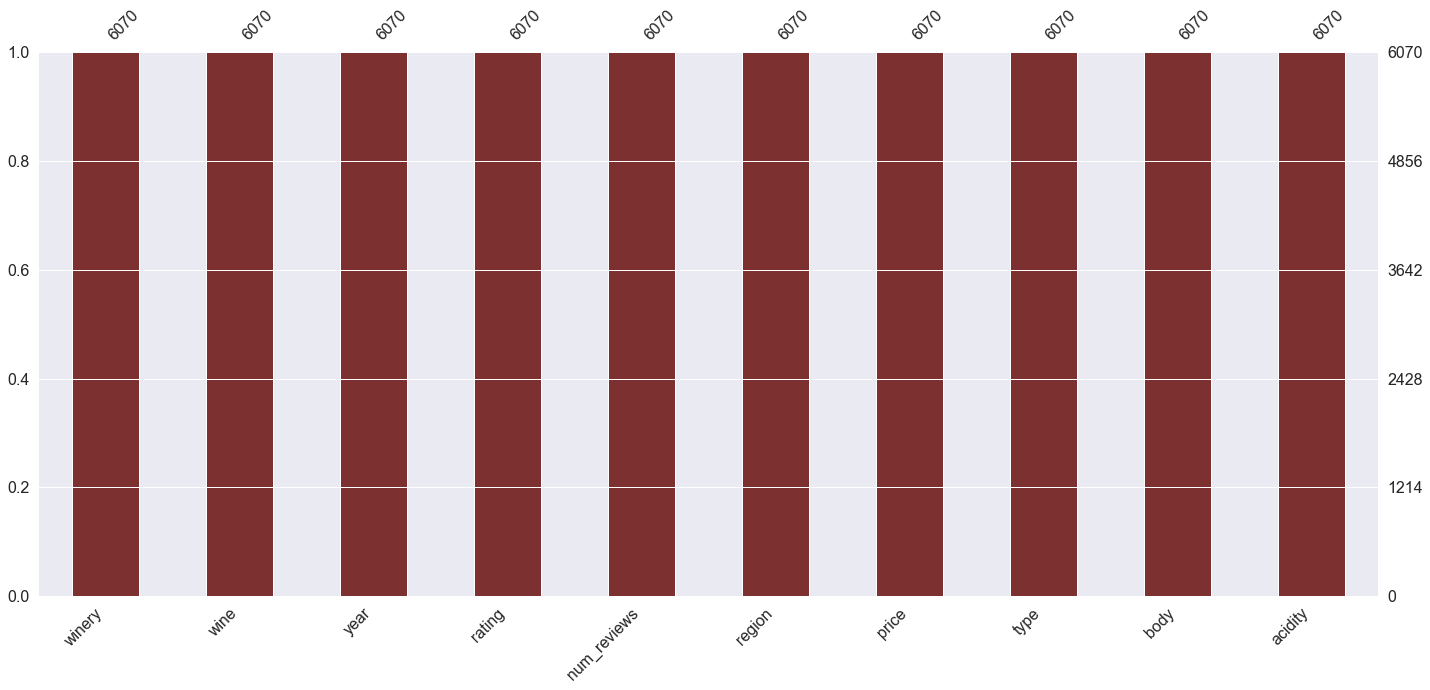

In [519]:
# Visualizamos los missings utilizando la libreria missingno
msno.bar(df_wine_spa, color= COLOR_VINO_TINTO)

## Outliers

## Outliers de variables numericas

Como de este dataset queremos sacar nuestra variable target que es `rating` analizaremos las correlaciones para esa variable. Y determinar con que variables vamos a analizar los outliers.

In [520]:
corr_rating = df_wine_spa.corr()["rating"].sort_values(ascending=False)
corr_rating

rating         1.000000
price          0.551943
body           0.161058
num_reviews   -0.003144
acidity       -0.085140
year          -0.299519
Name: rating, dtype: float64

<AxesSubplot:>

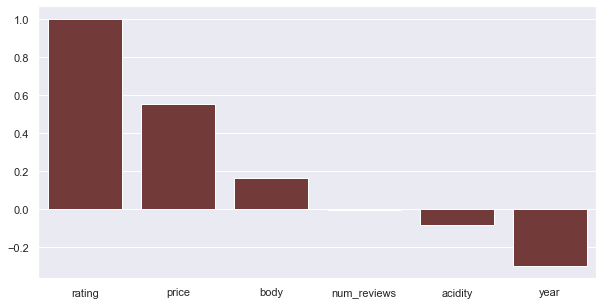

In [521]:
# bar plot of correlation
sns.barplot(x=corr_rating.index, y=corr_rating.values, color= COLOR_VINO_TINTO)

Trabajaremos los outliers de las columnas `price` y `body` y `year` ya que las otras columnas tienen correlacion considerable con la variable target, `ranting`.

Que la variable `year` tenga una correlacion inversa con la variable target, `rating` puede significar que conforme pasan los años el rating de los vinos va disminuyendo.

In [522]:
# Borramos las columnas num_reviews y acidity
df_wine_spa.drop(columns=['num_reviews', 'acidity'], inplace=True)
print(f"{df_wine_spa.shape=}")

df_wine_spa.shape=(6070, 8)


In [523]:
# Declaramos una lista vacia para almacenar los indices de los outliers a eliminar
index_outliers = []

### Price

### Descripcion de la columna price 

count    6070.000
mean       67.398
std       165.515
min         6.260
25%        19.980
50%        31.630
75%        61.940
max      3119.080
Name: price, dtype: float64


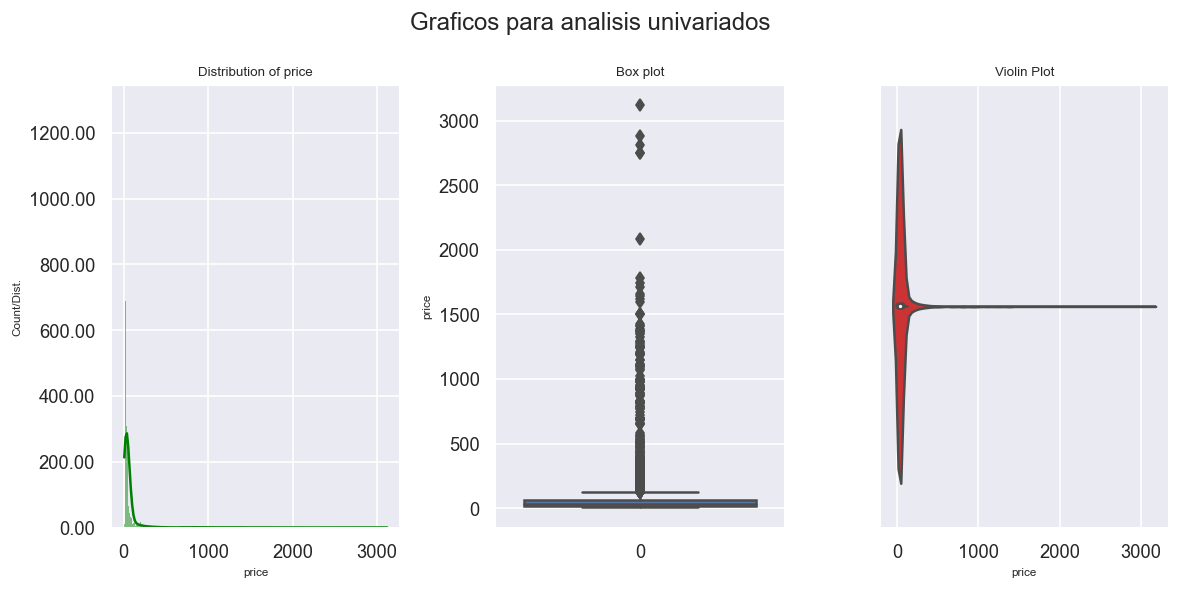

In [524]:
univariate_analysis(dataframe=df_wine_spa, column_name='price')

In [525]:
# Determinamos el valor limite para los outliers superiores
price_upper_limit = stats.get_upper_limit_whisker(df_wine_spa['price']).round(3)
# Filtramos las filas donde pH es mayor a la limite superior del boxplot
df_wine_spa_price_outliers = df_wine_spa[df_wine_spa['price'] > price_upper_limit]
# Representacion en porcentaje de los vinos que tienen un price mayor a la limite superior del boxplot
print(f"El {round(df_wine_spa_price_outliers['price'].count() * 100 / df_wine_spa['price'].count(), 2)} % de los vinos tienen un precio mayor a {price_upper_limit}")

El 7.18 % de los vinos tienen un precio mayor a 124.88


In [526]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_outliers.extend(df_wine_spa_price_outliers.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 436


### Body

### Descripcion de la columna body 

count    6070.000
mean        4.164
std         0.594
min         2.000
25%         4.000
50%         4.000
75%         5.000
max         5.000
Name: body, dtype: float64


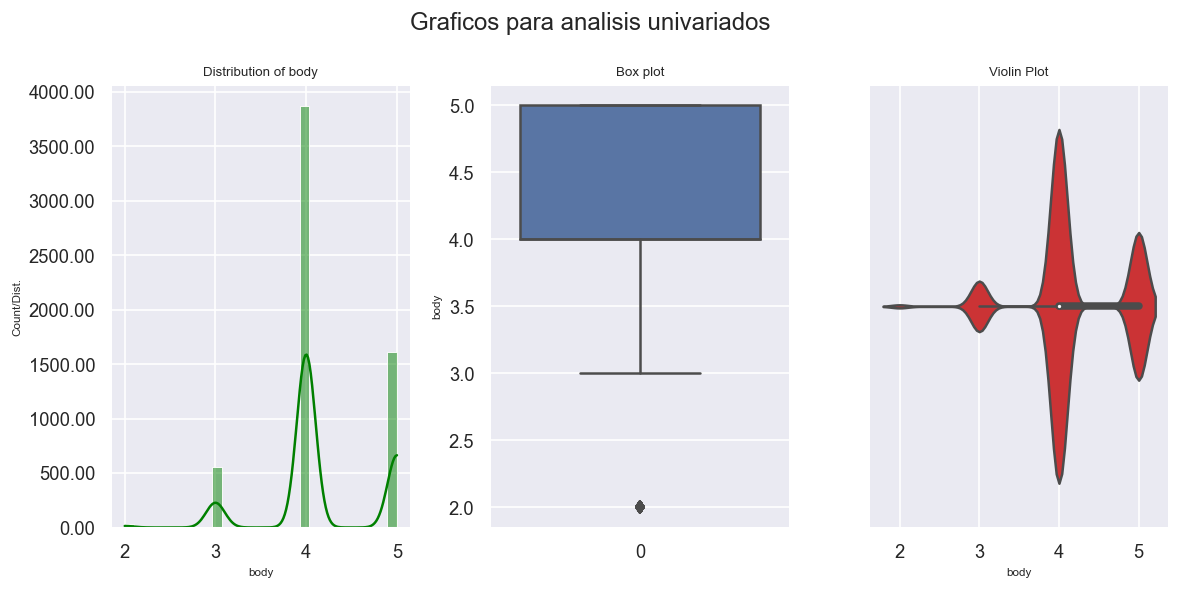

In [527]:
# Analisis univariado de la columna body
univariate_analysis(dataframe=df_wine_spa, column_name='body')

In [528]:
# Deterimos el valor limite para los outliers inferiores
body_lower_limit = stats.get_lower_limit_whisker(df_wine_spa['body']).round(3)
# Filtramos las filas donde pH es menor a la limite inferior del boxplot
df_wine_spa_body_outliers = df_wine_spa[df_wine_spa['body'] < body_lower_limit]
# Representacion en porcentaje de los vinos que tienen un body menor a la limite inferior del boxplot
print(f"El {round(df_wine_spa_body_outliers['body'].count() * 100 / df_wine_spa['body'].count(), 2)} % de los vinos tienen un body menor a {body_lower_limit}")

El 0.56 % de los vinos tienen un body menor a 2.5


In [529]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_outliers.extend(df_wine_spa_body_outliers.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 466


### Year

### Descripcion de la columna year 

count    6070.000
mean     2012.955
std         7.145
min      1910.000
25%      2011.000
50%      2015.000
75%      2017.000
max      2021.000
Name: year, dtype: float64


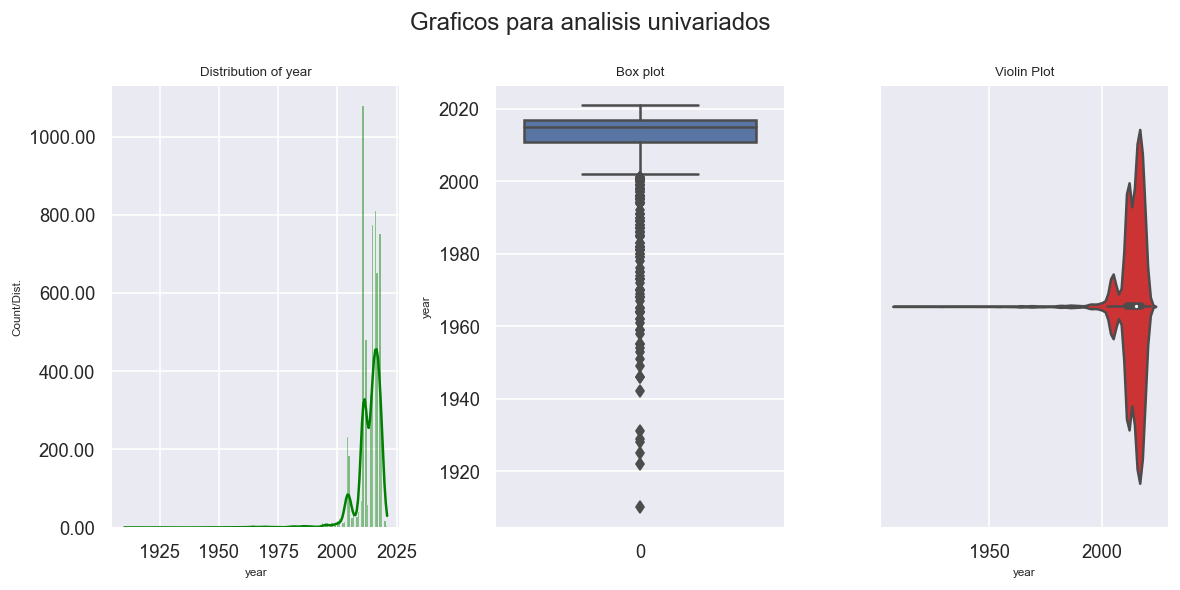

In [531]:
# Analisis univariado de la columna year
univariate_analysis(dataframe=df_wine_spa, column_name='year')

In [533]:
# Determinamos el valor limite para los outliers inferiores
year_lower_limit = stats.get_lower_limit_whisker(df_wine_spa['year']).round(3)
# Filtramos las filas donde pH es menor a la limite inferior del boxplot
df_wine_spa_year_outliers = df_wine_spa[df_wine_spa['year'] < year_lower_limit]
# Representacion en porcentaje de los vinos que tienen un year menor a la limite inferior del boxplot
print(f"El {round(df_wine_spa_year_outliers['year'].count() * 100 / df_wine_spa['year'].count(), 2)} % de los vinos tienen un year menor a {int(year_lower_limit)}")

El 3.23 % de los vinos tienen un year menor a 2002


In [534]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_outliers.extend(df_wine_spa_year_outliers.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 512


## Outliers de variables categoricas

In [535]:
# Repasamos el nombre de las columnas categoricas en df_wine_spa
categorical_columns = df_wine_spa.select_dtypes(include=['object']).columns
print(f"{categorical_columns=}")

categorical_columns=Index(['winery', 'wine', 'region', 'type'], dtype='object')


### Winery

In [538]:
# Verificamos los valores unicos de una columna categorica que tenemos: winery
winery_counts = df_wine_spa['winery'].value_counts(normalize = True)
winery_counts

Contino                   0.068204
Artadi                    0.039374
La Rioja Alta             0.037562
Sierra Cantabria          0.035420
Vina Pedrosa              0.034102
                            ...   
Particular                0.000165
Bodegas Frontonio         0.000165
Bodegas Asenjo & Manso    0.000165
Micro Bio (MicroBio)      0.000165
Bodegas Monte La Reina    0.000165
Name: winery, Length: 395, dtype: float64

Dado que son 395 winerys, haremos un plot de los 10 mas frecuentes

In [540]:
# Obtenemos la lista de los 10 winery mas comunes
winery_top_10 = winery_counts.index[:10]
winery_top_10


Index(['Contino', 'Artadi', 'La Rioja Alta', 'Sierra Cantabria',
       'Vina Pedrosa', 'Imperial', 'Losada', 'Matarromera', 'Sei Solo',
       'Portal del Priorat'],
      dtype='object')

<AxesSubplot:ylabel='winery'>

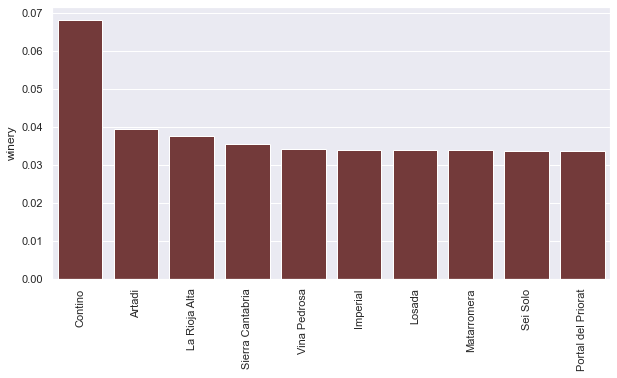

In [543]:
# Grafico de barras de los 10 winery mas comunes
plt.xticks(rotation=90)
sns.barplot(x=winery_top_10, y=winery_counts[winery_top_10], color= COLOR_VINO_TINTO)


### Wine

In [544]:
# Verificamos los valores unicos de una columna categorica que tenemos: wine
wine_counts = df_wine_spa['wine'].value_counts(normalize = True)
wine_counts

Reserva                                0.069522
Gran Reserva                           0.068369
Rioja Reserva                          0.035914
Valdegines                             0.033278
Corimbo I                              0.033278
                                         ...   
Savinat Sauvignon Blanc                0.000165
Felix Azpilicueta Coleccion Privada    0.000165
Cava Cuvee De Prestige Trepat          0.000165
Solanes Priorat                        0.000165
Rioja B70                              0.000165
Name: wine, Length: 677, dtype: float64

In [545]:
# Obtenemos la lista de los 10 wine mas comunes
wine_top_10 = wine_counts.index[:10]
wine_top_10


Index(['Reserva', 'Gran Reserva', 'Rioja Reserva', 'Valdegines', 'Corimbo I',
       'El Viejo', 'Rioja Graciano', 'Clos del Portal Somni',
       'Coleccion Privada', 'Preludio'],
      dtype='object')

<AxesSubplot:ylabel='winery'>

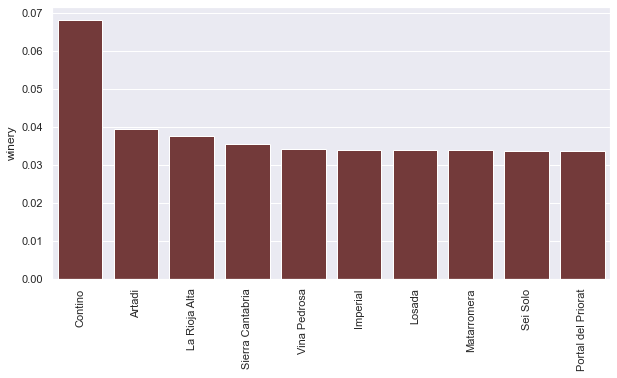

In [547]:
# Grafico de barras de los 10 winery mas comunes
plt.xticks(rotation=90)
sns.barplot(x=winery_top_10, y=winery_counts[winery_top_10], color= COLOR_VINO_TINTO)

### Region

In [548]:
# Verificamos los valores unicos de una columna categorica que tenemos: region
region_counts = df_wine_spa['region'].value_counts(normalize = True)
region_counts

Rioja                              0.365898
Ribera del Duero                   0.210873
Priorato                           0.102471
Toro                               0.043493
Vino de Espana                     0.039209
                                     ...   
Murcia                             0.000165
Ribera del Gallego-Cinco Villas    0.000165
Pla i Llevant                      0.000165
Binissalem-Mallorca                0.000165
Tarragona                          0.000165
Name: region, Length: 63, dtype: float64

<AxesSubplot:ylabel='region'>

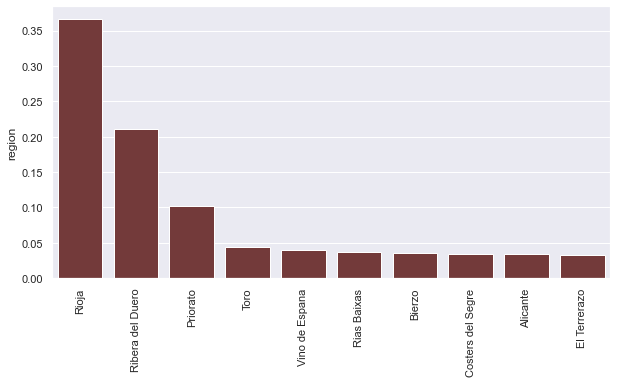

In [549]:
# Obtenemos la lista de los 10 regiones mas comunes y las graficamos en grafico de barras
region_top_10 = region_counts.index[:10]
plt.xticks(rotation=90)
sns.barplot(x=region_top_10, y=region_counts[region_top_10], color= COLOR_VINO_TINTO)

### Type

In [557]:
# Verificamos los valores unicos de una columna categorica que tenemos: type
type_counts = df_wine_spa['type'].value_counts(normalize = True)
type_counts

Rioja Red               0.353048
Ribera Del Duero Red    0.210379
Red                     0.129489
Priorat Red             0.102142
Tempranillo             0.043987
Toro Red                0.042998
Albarino                0.037068
Mencia                  0.035091
Rioja White             0.014168
Grenache                0.005437
Cava                    0.004778
Pedro Ximenez           0.004448
Verdejo                 0.004283
Monastrell              0.002801
Montsant Red            0.002306
Syrah                   0.002142
Chardonnay              0.002142
Cabernet Sauvignon      0.001647
Sparkling               0.000824
Sauvignon Blanc         0.000494
Sherry                  0.000329
Name: type, dtype: float64

<AxesSubplot:ylabel='type'>

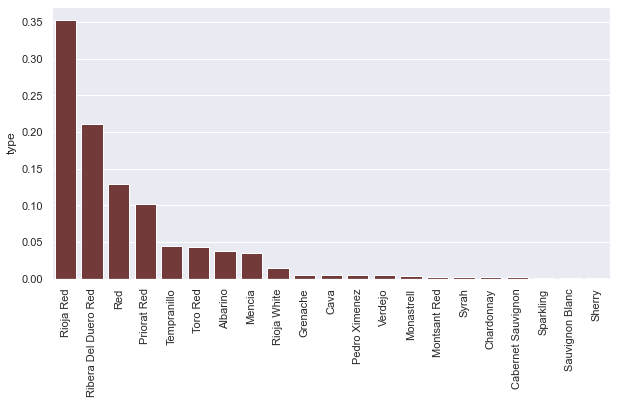

In [559]:
# Graficamos de barras de type counts
plt.xticks(rotation=90)
sns.barplot(x=type_counts.index, y=type_counts, color= COLOR_VINO_TINTO)

A simple vista no se ve inconsistencia en los datos de las variables categoricas.

# Limpieza de datos


Procedemos a eliminar los outlier encontrados.

In [560]:
#Eliminamos las filas que contienen outliers y reseteamos el index
print(f"La cantidad de columnas a eliminar es de {len(set(index_outliers))}")
df_wine_spa_clean = df_wine_spa.drop(index=index_outliers, inplace=False, axis=0).reset_index(drop=True)
print("Dataframe limpio")


La cantidad de columnas a eliminar es de 512
Dataframe limpio


In [565]:
shape_df_clean = df_wine_spa_clean.shape
print (f"Hay {shape_df_clean[0]} filas y {shape_df_clean[1]} columnas en el dataset de wine")
print (f"Hay {df_wine_spa_clean['type'].nunique()} typos de vino de como lo son {', '.join(df_wine_spa_clean['type'].unique()[0:5])}")
print (f"El promedio de rating es {round(df_wine_spa_clean['rating'].mean(), 3)} y su mediana es {round(df_wine_spa_clean['rating'].median(), 3)}")
print (f"El promedio de precios es {round(df_wine_spa_clean['price'].mean(), 3)} y su mediana es {round(df_wine_spa_clean['price'].median(), 3)}")

Hay 5558 filas y 8 columnas en el dataset de wine
Hay 18 typos de vino de como lo son Ribera Del Duero Red, Rioja Red, Toro Red, Tempranillo, Grenache
El promedio de rating es 4.235 y su mediana es 4.2
El promedio de precios es 37.491 y su mediana es 28.53


In [566]:
# Por ultimo guardamos el dataframe limpio en un archivo csv
WINE_SPA_CLEAN_CSV_PATH = data_dir("intermediate", "df_wine_spa_clean.csv")
df_wine_spa_clean.to_csv(WINE_SPA_CLEAN_CSV_PATH, index=False)
